In [ ]:
# External
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
# Std
import os
# Local
from lib.functions import show_sample_images
from CGAN import CGanNet

In [ ]:
NET_NAME = "Praca_test2_dropout_brak"
BATCH_SIZE = 32
IMAGE_WIDTH = 64
IMAGE_HEIGHT = 64
LEARNING_RATE: float = 0.0002
DROPOUT_RATE: float = None

In [ ]:
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
# Load dataset
(training_set, validation_set), dataset_info = tfds.load(
    'oxford_flowers102',
    split=['test', 'validation'],
    with_info=True,
    as_supervised=True,
)
# Get size of datasets from dataset_info
dataset_size = dataset_info.splits['test'].num_examples
print(f'Dataset size is: {dataset_size}')

# Get number of labels
num_classes = dataset_info.features['label'].num_classes
print(f'Number of different images class labels: {num_classes}')

In [ ]:
# Preprocessing images
def format_image(image, label):
    image = tf.cast(image, tf.float32)
    image = image / 255.0
    image = tf.image.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT))

    return image, label
train_batches = training_set.shuffle(dataset_size//4).map(format_image)

# Get labels numbers to names map
get_label_name = dataset_info.features['label'].int2str
labels_strings = { _: get_label_name(_) for _ in range(num_classes) }

# Create numpy arrays with images and labels
numpy_train_batches_images = np.array([_[0] for _ in train_batches])
numpy_train_batches_labels = np.array([_[1] for _ in train_batches])

In [ ]:
show_sample_images(numpy_train_batches_images, numpy_train_batches_labels, labels_strings, NET_NAME)

In [ ]:
cgan = CGanNet(net_name=NET_NAME,
               batch_size=BATCH_SIZE,
               image_width=IMAGE_WIDTH,
               image_height=IMAGE_HEIGHT,
               learning_rate= LEARNING_RATE,
               dropout_rate= DROPOUT_RATE,
               number_of_channels=3,
               latent_dimension=100,
               training_data=numpy_train_batches_images,
               labels_data=numpy_train_batches_labels,
               number_of_classes=num_classes,
               labels_names = labels_strings)

In [ ]:
# Define GAN models
cgan.define_discriminator()
cgan.define_generator()
cgan.define_gan()

In [ ]:
# cgan.train(number_of_epochs=1, load_past_model=False)

Number of images in dataset: 6149
Batches per epoch: 192
Half batch size is: 16
----> Load epoch number: 201 from file /home/kamil/Repositories/GAN_mg/Praca_test2_dropout_brak_data/.epoch
------------------------------------------------------------
---> Epoch: 202 1/100
---> Start time is: 23:32:17
192/192 [==============================] - 36s 187ms/step
---> End time is: 23:32:52
---> D_real_loss: 0.663779616355896 D_fake_loss: 0.43553125858306885 G_loss: 1.027561902999878
----> D_real_acc: 0.5 D_fake_acc: 0.8125
----> Epoch training time: 0.0h 0.0m, 35s
------------------------------------------------------------
---> Epoch: 203 2/100
---> Start time is: 23:32:53
192/192 [==============================] - 36s 188ms/step
---> End time is: 23:33:29
---> D_real_loss: 0.5768329501152039 D_fake_loss: 0.6256306171417236 G_loss: 1.075015664100647
----> D_real_acc: 0.75 D_fake_acc: 0.6875
----> Epoch training time: 0.0h 0.0m, 36s
------------------------------------------------------------


----> Total training time: 2.0h 59.0m, 4s


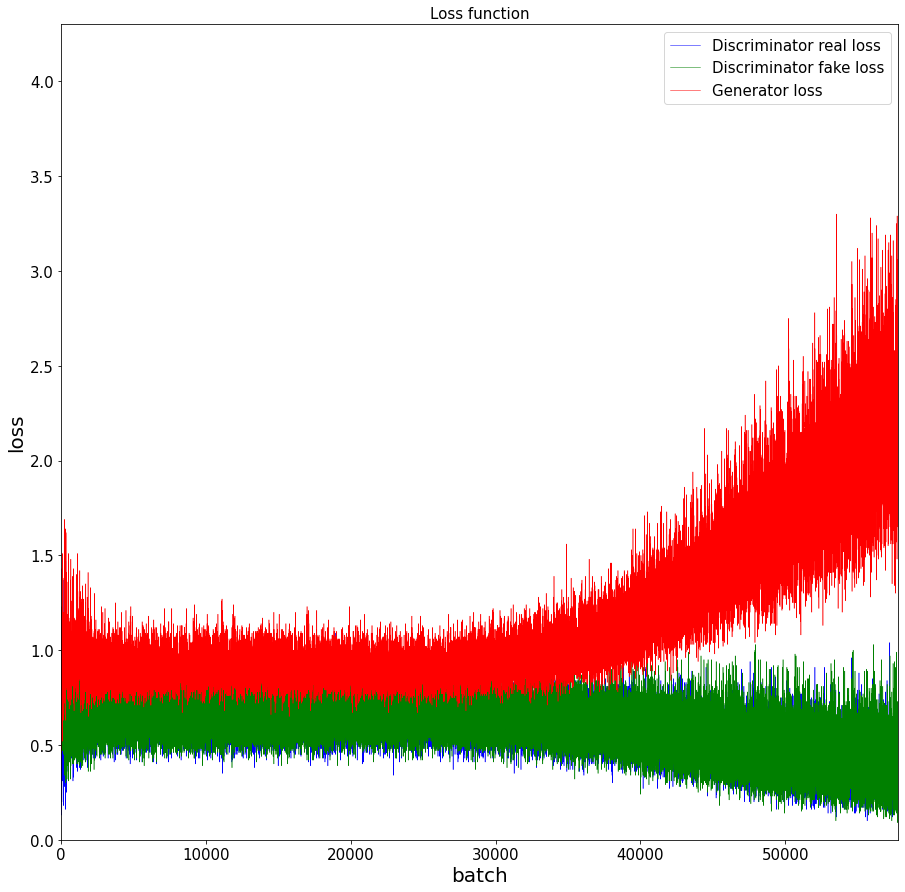

In [14]:
cgan.train(number_of_epochs=100, load_past_model=True)

In [15]:
cgan.get_training_time()

----> Total training time: 2.0h 59.0m, 4s


In [11]:
cgan.visualize_models()